### Midterm 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')

### Problem 3

Consider the cubic map: $x_{n+1} = f(x_n) = \lambda x_n - x_n^3$ with $-2 \leq x_n \leq 2$ and $0 \leq \lambda \leq 3$


##### Problem 3b

(i) Find the period-2 orbit(s) as a function of $\lambda$.

Notice $f^2(x_n) = x_n$ below to find the period-2 orbit(s):

$$
\begin{align*}
    f^2(x_n) &= \lambda (\lambda x_n - x_n^3) - (\lambda x_n - x_n^3)^3 \\
    x_n &= \lambda^2 x_n - \lambda x_n^3 - \lambda^3x_n^3 + 3\lambda^2x_n^5 - 3\lambda x_n^7 + x_n^9 \\
    0 &= x_n \bigg(\lambda^2 - \lambda x_n^2 - \lambda^3x_n^2 + 3\lambda^2x_n^4 - 3\lambda x_n^6 + x_n^8 - 1\bigg) \\
    0 &= x_n \bigg(x_n^8 - 3\lambda x_n^6 + 3\lambda^2x_n^4 - (\lambda + \lambda^3)x_n^2 + \lambda^2 - 1\bigg) \\
    0 &= x_n \bigg(x_n^2 - (\lambda - 1)\bigg) \bigg(x_n^6 - (1+2\lambda)x_n^4 + (1+\lambda+\lambda^2)x_n^2 - (1 + \lambda)\bigg)
\end{align*}
$$

From here, we set $z = x_n^2$ such that, we get:

$$
0 = \sqrt{z} \bigg(z - (\lambda - 1)\bigg) \bigg(z^3 - (1+2\lambda)z^2 + (1+\lambda+\lambda^2)z - (1 + \lambda)\bigg)
$$

We know that $z = \lambda + 1$ is a root, such that we get:

$$
0 = \sqrt{z} \bigg(z - (\lambda - 1)\bigg) \bigg(z - (\lambda + 1)\bigg) \bigg(z^2 - \lambda z + 1\bigg)
$$

From here, we can see we have the fixed points:

$$
x_{1,1} = 0 \qquad x_{1,2-3} = \pm \sqrt{\lambda  - 1}
$$

And the period-2 orbits are:

$$
x_{2,1-2} = \pm \sqrt{\lambda + 1} \qquad x_{2,3-6} = \pm \sqrt{\frac{\lambda \pm \sqrt{\lambda^2 - 4}}{2}}
$$

(ii) Plot these orbits as a function of $\lambda$. [Hint: $f^2(x) = x$ is a polynomial of degree 9 but you can factor 3 roots from period one and then cast the period-2 equation using the variable $z = x^2$ as a third order polynomial on $z$. Note that $z = \lambda + 1$ is a root of this last polynomial so you can finally get a quadratic for $z$ that you can explicitly solve.]


Text(0, 0.5, '$x_n$')

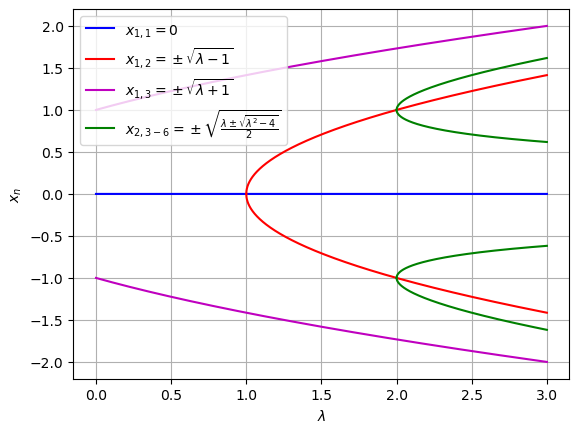

In [2]:
x11 = lambda a: 0*a
x12 = lambda a: np.sqrt(a - 1)
x13 = lambda a: -np.sqrt(a - 1)
x21 = lambda a: np.sqrt(a + 1)
x22 = lambda a: -np.sqrt(a + 1)
x23 = lambda a: np.sqrt( (a + np.sqrt(a**2 - 4)) / (2) )
x24 = lambda a: np.sqrt( (a - np.sqrt(a**2 - 4)) / (2) )
x25 = lambda a: -np.sqrt( (a + np.sqrt(a**2 - 4)) / (2) )
x26 = lambda a: -np.sqrt( (a - np.sqrt(a**2 - 4)) / (2) )

lambda1_range = np.linspace(0,3,int(1e4))
lambda2_range = np.linspace(1,3,int(1e4))
lambda3_range = np.linspace(0,3,int(1e4))
lambda4_range = np.linspace(2,3,int(1e4))

plt.grid()
plt.plot(lambda1_range, x11(lambda1_range), 'b-', label="$x_{1,1} = 0$")
plt.plot(lambda2_range, x12(lambda2_range), 'r-', label="$x_{1,2} = \pm \sqrt{\lambda - 1}$")
plt.plot(lambda2_range, x13(lambda2_range), 'r-')
plt.plot(lambda3_range, x21(lambda3_range), 'm-', label="$x_{1,3} = \pm \sqrt{\lambda + 1}$")
plt.plot(lambda3_range, x22(lambda3_range), 'm-')
plt.plot(lambda4_range, x23(lambda4_range), 'g-', label="$x_{2,3-6} = \pm \sqrt{\\frac{{{\lambda \pm \sqrt{\lambda^2 - 4}}}}{{{2}}}}$")
plt.plot(lambda4_range, x24(lambda4_range), 'g-')
plt.plot(lambda4_range, x25(lambda4_range), 'g-')
plt.plot(lambda4_range, x26(lambda4_range), 'g-')
plt.legend(loc='upper left')
plt.xlabel('$\lambda$')
plt.ylabel('$x_n$')

#### Problem 3c

Let $\lambda = 3$

(i) Draw two cobweb orbits, one with $x_0 = 1.9$ and one with $x_0 = 2.1$.


<Axes: xlabel='$x_n$', ylabel='$f(x_n)$'>

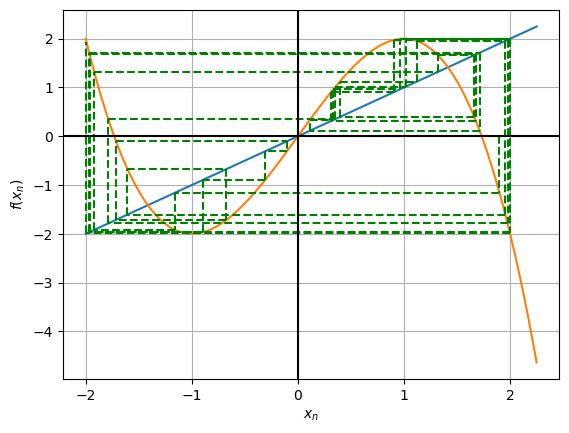

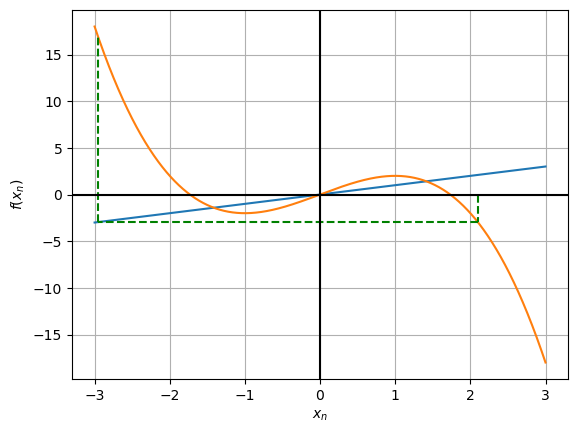

In [3]:
def cobweb_plot(input_vals, f, x_range, num_iters):
    x_vals = np.linspace(x_range[0], x_range[1], 10_000)
    y_vals = x_vals
    f_vals = f(x_vals)

    fig, ax = plt.subplots()

    # Plot f and Diagonal
    ax.plot(x_vals, y_vals, '-')
    ax.plot(x_vals, f_vals, '-')
    ax.grid()

    for input_val in input_vals:
        vert_bottom_y = 0
        horz_left_x = input_val
        for i in range(num_iters):
            #Vertical Line
            ax.vlines(horz_left_x, vert_bottom_y, f(horz_left_x),
                        colors='green', linestyles='dashed')
            #Horizontal Lines
            if i != num_iters - 1:
                ax.hlines(f(horz_left_x), horz_left_x, f(horz_left_x),
                        colors='green', linestyles='dashed')
            #Update Starting Values
            vert_bottom_y = f(horz_left_x)
            horz_left_x = f(horz_left_x)

    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$f(x_n)$')

    #Axes
    ax.axhline(0, color='black', linewidth=1.5)
    ax.axvline(0, color='black', linewidth=1.5)

    return ax

cobweb_plot([1.9], lambda x: 3*x - x**3, (-2, 2.25), 30)
cobweb_plot([2.1], lambda x: 3*x - x**3, (-3, 3), 2)

(ii) Explain the difference between the two orbits.

For $x_0 = 1.9$, the plot is orbiting between $x_n = \sqrt{2}$ and $x_n = -\sqrt{2}$. Whereas for $x_0 = 2.1$, the plot is heading away from $x_n = 0$, so $x_n = 0$ is a source. As seen earlier, when $\lambda = 3$, we get that the period-2 orbits of $x_{2,1-2} = \pm 2$. On the left side of $x_{2,1}$, we get that the orbit is stable, and on the right side, we get that the orbit is unstable, such that concluding that $x_{2,1}$ is a period-2 saddle.


#### Problem 3d

Draw a bifurcation diagram for the cubic map. Be sure to include positive and negative initial conditions. Compare the diagram with that of the logistic map.


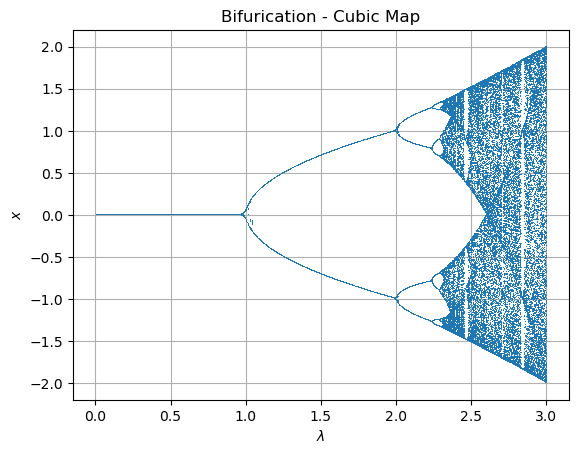

In [4]:
def plot_bifurication(a_range=np.linspace(0,3,int(1e4)), f=lambda a,x: a*x - x**3, title='Cubic Map', filename='prob-3d-plot'):
    fig, ax = plt.subplots()

    x_vals = []
    plot_a_vals = []
    for a in a_range:
        x = (random.random() * 4) - 2
        for _ in range(int(1e2)):
            x = f(a, x)
        for _ in range(int(15)):
            x = f(a, x)
            x_vals.append(x)
            plot_a_vals.append(a)
    plt.plot(plot_a_vals, x_vals, ',')

    plt.xlabel('$\lambda$')
    plt.ylabel('$x$')
    plt.title('Bifurication - ' + title)
    plt.grid()

    plt.savefig(filename + '.png')

    return fig

a = plot_bifurication()

As you can see, this looks like the Logistics Map in the sense that it branches into 2 subbranches and then forth recursively.


### Problem 4

Consider the Henon Map: $H: \begin{cases}x_{n+1} = a - x_n^2 + by_n \\ y_{n+1} = x_n\end{cases}$

(g) [Extra Credit] Find the second iterate of the map and the its inverse. Repeat (f) for period-2 orbits.


#### Problem 4c

Find the period-2 orbit $\{x_{2,1}, x_{2,2}\}$.

Notice $H^2\begin{pmatrix}x_n \\ y_n \end{pmatrix} = \begin{pmatrix}x_n \\ y_n \end{pmatrix}$ below to find the period-2 orbit(s):

Now notice the solutions for the period 2 orbits of the Henon Map:

$$
\begin{align*}
    a - (a - x^2 + by)^2 + bx &= x \\
    a - x^2 + by &= y
\end{align*}
$$

Simplifying this, we get:
$$\bigg(x^2 - (1 - b)x - a + (1 - b)^2\bigg)\bigg(x^2 + (1 - b)x - a\bigg) = 0$$
We can see that the right factor is the previous fixed point equations, so we can find the period-two orbits from the left factor such that:
$$x_{2,1-2} = \frac{(1 - b) \pm \sqrt{(1 - b)^2 - 4(-a+(1-b)^2)}}{2} = \frac{(1 - b) \pm \sqrt{4a - 3(1-b)^2}}{2}$$


#### Problem 4d

From now on, we will ONLY consider the parameter values: $a = 1.2$ and $b = 0.4$

Determine the stability of the fixed points $x_{1,1}$ and $x_{1,2}$. $(a = 1.2 \text{ and } b = 0.4)$

Notice the fixed point can be found through the solution:

$$
x_{1-1/2} = y_{1-1/2} = \frac{-(1 - b) \pm \sqrt{(1 - b)^2 + 4a}}{2} = \frac{-(1 - 0.4) \pm \sqrt{(1 - 0.4)^2 + 4(1.2)}}{2} = \frac{-0.6 \pm \sqrt{0.36 + 4.8}}{2} = \frac{-0.6 \pm \sqrt{5.16}}{2} = 0.8357, -1.4357
$$

Notice the Jacobian to calculate the eigenvalues to determine stability:

$$
DH(x,y) = \begin{pmatrix}-2x & b \\ 1 & 0\end{pmatrix}
$$

To find the stability at $(0.8357, 0.8357)$, we get the following eigenvalues:

$$
|DH(0.8357, 0.8357) - \lambda I| = \left|\begin{pmatrix}-2(0.8357) - \lambda & 0.4 \\ 1 & 0 - \lambda\end{pmatrix}\right| = 0 \qquad \lambda = -1.88388996, 0.21232663
$$

Thus, we get that $(x_{1,1}, y_{1,1}) = (0.8357, 0.8357)$ is a saddle point

To find the stability at $(-1.4357, -1.4357)$, we get the following eigenvalues:

$$
|DH(-1.4357, -1.4357) - \lambda I| = \left|\begin{pmatrix}-2(-1.4357) - \lambda & 0.4 \\ 1 & 0 - \lambda\end{pmatrix}\right| = 0 \qquad \lambda = 3.00468861, -0.13312528
$$

Thus, we get that $(x_{1,2}, y_{1,2}) = (-1.4357, -1.4357)$ is a saddle point


In [5]:
a = 1.2
b = 0.4
x11 = (-(1 - b) + np.sqrt((1 - b)**2 + 4*a)) / 2
x12 = (-(1 - b) - np.sqrt((1 - b)**2 + 4*a)) / 2
y11 = x11
y12 = x12

DH1 = np.matrix([[-2*x11, b], [1, 0]])
DH2 = np.matrix([[-2*x12, b], [1, 0]])

print(x11, y11)
print(np.linalg.eigvals(DH1))
print()
print(x12, y12)
print(np.linalg.eigvals(DH2))

0.8357816691600546 0.8357816691600546
[-1.88388996  0.21232663]

-1.4357816691600547 -1.4357816691600547
[ 3.00468861 -0.13312528]


#### Problem 4e

Determine the stability of the period-2 orbits $x_{2,1}$ and $x_{2,2}$. $(a = 1.2 \text{ and } b = 0.4)$

Notice the period-2 orbits can be found through the solution:

$$
x_{2,1-2} = \frac{(1 - b) \pm \sqrt{4a - 3(1-b)^2}}{2} = \frac{(1 - 0.4) \pm \sqrt{4(1.2) - 3(1-0.4)^2}}{2} = \frac{0.6 \pm \sqrt{4.8 - 1.08}}{2} = \frac{0.6 \pm \sqrt{3.72}}{2} = 1.2643, -0.6643
$$

Notice the Jacobian to calculate the eigenvalues to determine stability:

$$
D^2H(x_{2,1},y_{2,1}) = \begin{pmatrix}-2x_{2,2} & b \\ 1 & 0\end{pmatrix}\begin{pmatrix}-2x_{2,1} & b \\ 1 & 0\end{pmatrix}
$$

To find the stability at $(1.2643, -0.6641)$, we get the following eigenvalues:

$$
|D^2H(1.2643, -0.6641) - \lambda I| = \left|\begin{pmatrix}-2(-0.6643)& 0.4 \\ 1 & 0\end{pmatrix}\begin{pmatrix}-2(1.2643)& 0.4 \\ 1 & 0\end{pmatrix} - \lambda I\right| =
\left|\begin{pmatrix}-2.95949796 - \lambda & 0.53144 \\ -2.5286 & 0.4 - \lambda\end{pmatrix}\right| = 0 \qquad \lambda = -2.49589473 -0.06410527
$$

Thus we get that the two period-2 orbits: $(x_{2,1}, y_{2,1}) = (1.2643, -0.6641)$ and $(x_{2,2}, y_{2,2}) = (-0.6643, 1.2645)$ are both saddle points


In [6]:
a = 1.2
b = 0.4
x21 = ((1 - b) + np.sqrt(4*a - 3*(1 - b)**2)) / 2
x22 = ((1 - b) - np.sqrt(4*a - 3*(1 - b)**2)) / 2
y21 = (a - x21**2) / (1 - b)
y22 = (a - x22**2) / (1 - b)

DH1 = np.matrix([[-2*x21, b], [1, 0]])
DH2 = np.matrix([[-2*x22, b], [1, 0]])

D2H = np.dot(DH2, DH1)
print(x21, y21)
print(x22, y22)
print(np.linalg.eigvals(D2H))

1.2643650760992955 -0.6643650760992955
-0.6643650760992954 1.2643650760992957
[-2.49589473 -0.06410527]


#### Problem 4f

(i) Write a program to draw the stable and unstable manifolds for fixed points. Plot stable manifolds in blue (or solid) and unstable manifolds in red (or dashed).

(ii) Also plot the eigenvectors and manifolds associated with the fixed points found in (a).

(iii) On the same graph, also plot, using small dots, a typical orbit for the Henon map (after discarding some 100 iterates).

(iv) Comment on the relation between the orbit and the manifolds. $(a = 1.2 \text{ and } b = 0.4)$


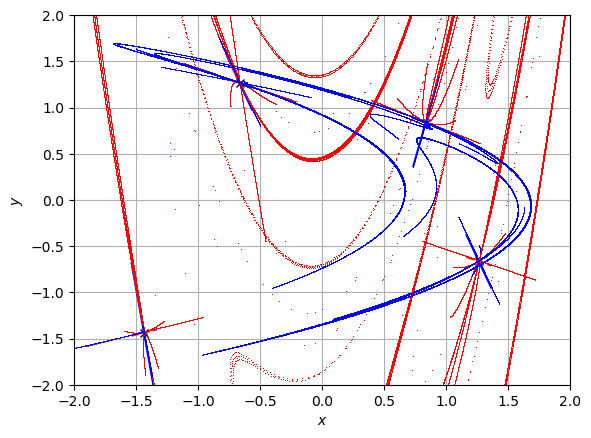

In [7]:
def fixed_point_manifolds(a=1.2,b=0.4):
    x11 = (-(1 - b) + np.sqrt((1 - b)**2 + 4*a)) / 2
    x12 = (-(1 - b) - np.sqrt((1 - b)**2 + 4*a)) / 2
    y11 = x11
    y12 = x12

    x21 = ((1 - b) + np.sqrt(4*a - 3*(1 - b)**2)) / 2
    x22 = ((1 - b) - np.sqrt(4*a - 3*(1 - b)**2)) / 2
    y21 = (a - x21**2) / (1 - b)
    y22 = (a - x22**2) / (1 - b)

    DH1 = np.matrix([[-2*x11, b], [1, 0]])
    DH2 = np.matrix([[-2*x12, b], [1, 0]])
    D2H = np.dot(np.matrix([[-2*x21, b], [1, 0]]), np.matrix([[-2*x22, b], [1, 0]]))

    fp11 = {'fxpt': (x11, y11), 'eigvals': np.linalg.eig(DH1).eigenvalues, 'eigvecs': np.linalg.eig(DH1).eigenvectors}
    fp12 = {'fxpt': (x12, y12), 'eigvals': np.linalg.eig(DH2).eigenvalues, 'eigvecs': np.linalg.eig(DH2).eigenvectors}
    fp21 = {'fxpt': (x21, y21), 'eigvals': np.linalg.eig(D2H).eigenvalues, 'eigvecs': np.linalg.eig(D2H).eigenvectors}
    fp22 = {'fxpt': (x22, y22), 'eigvals': np.linalg.eig(D2H).eigenvalues, 'eigvecs': np.linalg.eig(D2H).eigenvectors}

    return (fp11, fp12, fp21, fp22)

def plot_fixed_point_manifolds(fps, a=1.2, b=0.4, f=lambda x, y, a, b: (a - x**2 + b*y, x), inv_f=lambda x, y, a, b: (y, (x - a + y**2) / b), d_val=0.5, steps=10000, num_iters=15, xlim=(-2,2), ylim=(-2,2)):
    plt.grid()
    for fp in (fps):
        x_range = np.linspace(fp['fxpt'][0] - 0.1, fp['fxpt'][0] + 0.1, int(1e4))
        point_slope = lambda x, slope, point : slope * (x - point[0]) + point[1]
        c0 = 'b-' if np.abs(fp['eigvals'][0]) < 1 else 'r--'
        c1 = 'b-' if np.abs(fp['eigvals'][1]) < 1 else 'r--'
        plt.plot(x_range, point_slope(x_range, fp['eigvecs'][1,0] / fp['eigvecs'][0,0], fp['fxpt']) , c0)
        plt.plot(x_range, point_slope(x_range, fp['eigvecs'][1,1] / fp['eigvecs'][0,1], fp['fxpt']) , c1)
        plt.plot(fp['fxpt'][0], fp['fxpt'][1], 'kx')

        for fb in (1,-1):
            for i in range(len(fp['eigvals'])):
                func = f if np.abs(fp['eigvals'][i]) < 1 else inv_f
                c = 'b,' if np.abs(fp['eigvals'][i]) < 1 else 'r,'
                d = fb * d_val
                x0 = fp['fxpt'][0] + d*fp['eigvecs'][0,i]
                y0 = fp['fxpt'][1] + d*fp['eigvecs'][1,i]
                manifold_x = np.linspace(fp['fxpt'][0], x0, steps)
                manifold_y = np.linspace(fp['fxpt'][1], y0, steps)

                for i in range(num_iters):
                    f_manifold_x = []
                    f_manifold_y = []
                    for x, y in zip(manifold_x[i * steps:], manifold_y[i * steps:]):
                        temp_pt = func(x, y, a, b)
                        f_manifold_x.append(temp_pt[0])
                        f_manifold_y.append(temp_pt[1])
                    manifold_x = np.concatenate([manifold_x, f_manifold_x])
                    manifold_y = np.concatenate([manifold_y, f_manifold_y])
                plt.plot(manifold_x, manifold_y, c)

    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])
    plt.xlabel('$x$')
    plt.ylabel('$y$')

    return None

plot_fixed_point_manifolds(fixed_point_manifolds())

The orbits are all connected by the same manifold and lines, whereas the fixed points have their own manifolds and lines that don't connect them.


### Problem 5

Introduction: In the paper: "Localized breathing oscillations for Bose-Einstein condensates in periodic traps" by R. Carretero-Gonzalez and K. Promislow, $Phys Rev.$ A 66, 3 (2002) 033610 (see: htp://carretero.sdsu.edu/[Publications][paper #13]), the authors discuss how the left-right vibrations of a one-dimensional chain of interacting 'blobs' of quantum matter (Bose-Einstein condensate) can be reduced to a two dimensional map on the consecutive amplitudes of oscillation

<img src="figs/fig2-prob5.PNG" width="600" />

Fig. 2 from Carretero-Gonazlez and Promislow ($A_i$ is the $Y$-coordinate of $P_i$)

The aim of this exercise is to reproduce the stable and unstable manifolds depicted in Fig 2 of the paper (see figure above). Notice the intricate way the manifolds intersect. This type of intersection is called a homoclinic tangle [homoclinic since it connects a fixed point with itself and tangle because of the obvious intricate intersection pattern]

Consider the following two-dimensional map $M = \begin{cases} x_{n+1} = y_n \\ y_{n+1} = (a+by_n^2)y_n - x_n\end{cases}$

(f) [Extra Credit] Repeat (d) and (e) for the point $Q_0$ lying on the intersection of the stable and unstable manifolds, that is between $P_0$ and $P_1$. Why does the $P_i$ orbit (and the $Q_i$ orbit) follows every two intersections of the manifolds? Can stable and unstable manifolds intersect just once (away from the fixed point)? Elaborate.


#### Problem 5a

(i) Find the fixed point(s) of $M$

To find the fixed points, we need to find the following solutions:

$$
\begin{align*}
    y_n &= x_n \\
    (a+by_n^2)y_n - x_n &= y_n \\
    (a+by_n^2)y_n - y_n &= y_n \\
    (a+by_n^2)y_n - 2y_n &= 0 \\
    y_n(a+by_n^2 - 2) &= 0
\end{align*}
$$

Such that, we get the following fixed points:

$$
x_n = y_n = 0 \qquad  x_n = y_n = \pm\sqrt{\frac{2 - a}{b}}
$$

(ii) Classify its(their) stability as a function of $a$ and $b$ [i.e., for arbitrary values of ($a,b$)]

Notice the Jacobian of $M$:

$$
DM(x_n, y_n) = \begin{pmatrix}0 & 1 \\ -1 & a + 3by_n^2\end{pmatrix}
$$

The eigenvalues evaluated at $(x_{1,1},y_{1,1}) = (0,0)$ can be found:

$$
|DM(0, 0) - \lambda I| = \left|\begin{pmatrix}0 - \lambda & 1 \\ -1 & a - \lambda\end{pmatrix}\right| = (-\lambda)(a - \lambda) + 1 = \lambda^2 - a\lambda + 1 = 0 \qquad \lambda = \frac{a \pm \sqrt{a^2 - 4}}{2}
$$

For $a < -2$ and $b \in \mathbb{R}$, $\left|\lambda\right| = \left|\frac{a + \sqrt{a^2 - 4}}{2}\right| < 1$ and $\left|\lambda\right| = \left|\frac{a - \sqrt{a^2 - 4}}{2}\right| > 1$. Such that the fixed point $(x_{1,1},y_{1,1}) = (0,0)$ is a saddle.

For $a > 2$ and $b \in \mathbb{R}$, $\left|\lambda\right| = \left|\frac{a + \sqrt{a^2 - 4}}{2}\right| > 1$ and $\left|\lambda\right| = \left|\frac{a - \sqrt{a^2 - 4}}{2}\right| < 1$. Such that the fixed point $(x_{1,1},y_{1,1}) = (0,0)$ is a saddle.

The eigenvalues evaluated at $(x_{1,2-3},y_{1,2-3}) = \left(\pm\sqrt{\frac{2 - a}{b}},\pm\sqrt{\frac{2 - a}{b}}\right)$ can be found:

$$
|DM\left(\pm\sqrt{\frac{2 - a}{b}}, \pm\sqrt{\frac{2 - a}{b}}\right) - \lambda I| = \left|\begin{pmatrix}0 - \lambda & 1 \\ -1 & 6 - 3a - \lambda\end{pmatrix}\right| = (-\lambda)(6 - 3a - \lambda) + 1 = \lambda^2 - (6 - 3a)\lambda + 1 = 0 \qquad \lambda = \frac{(6 - 3a) \pm \sqrt{(6 - 3a)^2 - 4}}{2}
$$

For $a < \frac{4}{3}$ and $b \in \mathbb{R}$, $\left|\lambda\right| = \left|\frac{(6 - 3a) + \sqrt{(6 - 3a)^2 - 4}}{2}\right| > 1$ and $\left|\lambda\right| = \left|\frac{(6 - 3a) - \sqrt{(6 - 3a)^2 - 4}}{2}\right| < 1$. Such that the fixed points $(x_{1,2-3},y_{1,2-3}) = \left(\pm\sqrt{\frac{2 - a}{b}},\pm\sqrt{\frac{2 - a}{b}}\right)$ are saddles.

For $a > \frac{8}{3}$ and $b \in \mathbb{R}$, $\left|\lambda\right| = \left|\frac{(6 - 3a) + \sqrt{(6 - 3a)^2 - 4}}{2}\right| < 1$ and $\left|\lambda\right| = \left|\frac{(6 - 3a) - \sqrt{(6 - 3a)^2 - 4}}{2}\right| > 1$. Such that the fixed points $(x_{1,2-3},y_{1,2-3}) = \left(\pm\sqrt{\frac{2 - a}{b}},\pm\sqrt{\frac{2 - a}{b}}\right)$ are saddles.

(iii) What are the conditions on $a$ and $b$ such that the origin $(0,0)$ is a saddle point?

For $a < -2$ or $a > 2$ and $b \in \mathbb{R}$, the origin $(0,0)$ is a saddle point.


#### Problem 5b

(i) Find the period-2 orbit $\{x_{2,1}, x_{2,2}\}$ as a function of $a$ and $b$.

To find the period-2 orbit, we need to find the following solutions:

$$
\begin{align*}
    (a+by_n^2)y_n - x_n &= x_n \\
    (a+by_n^2)y_n &= 2x_n \\
    \frac{(a+by_n^2)y_n}{2} &= x_n \\
    (a+b((a+by_n^2)y_n - x_n)^2)((a+by_n^2)y_n - x_n) - y_n &= y_n \\
    \left(a+b\left((a+by_n^2)y_n - \frac{(a+by_n^2)y_n}{2}\right)^2\right)\left((a+by_n^2)y_n - \frac{(a+by_n^2)y_n}{2}\right) - y_n &= y_n \\
    \left(a+b\left(\frac{(a+by_n^2)y_n}{2}\right)^2\right)\left(\frac{(a+by_n^2)y_n}{2}\right) - 2y_n &= 0 \\
    \frac{a(a+by_n^2)y_n}{2} + b\left(\frac{(a+by_n^2)y_n}{2}\right)^3 - 2y_n &= 0 \\
    \frac{a(a+by_n^2)y_n}{2} + \frac{b(a+by_n^2)^3y_n^3}{8} - 2y_n &= 0 \\
    4a(a+by_n^2)y_n + b(a+by_n^2)^3y_n^3 - 16y_n &= 0 \\
    y_n(4a(a+by_n^2) + b(a+by_n^2)^3y_n^2 - 16) &= 0 \\
    y_n(b^4y_n^8 + 3ab^3y_n^6 + 3a^2b^2y_n^4 + (4ab + a^3b)y_n^2 + 4a^2 - 16) &= 0 \\
    y_n(by_n^2 + a - 2)(b^3y_n^6 + 2b^2(a + 1)y_n^4 + (a^2+2a+4)by_n^2 + 4(a + 2)) &= 0 \\
\end{align*}
$$

(ii) Using a computer, plot the eigenvalues for this periodic orbit as a function of $a$ (yes, they depend on $a$).

(iii) Using this plot, determine the stability of the period-2 orbit as a function of $a$.

(iv) In particular, what is its stability for $a = 2.75$ and $b = -100$


#### Problem 5c

(i) For arbitrary values of $(a,b)$, find the inverse of $M$.

$$
M^{-1} = \begin{cases} x_{n} = y_{n+1} \\ y_{n} = (a+by_{n+1}^2)y_{n+1} - x_{n+1}\end{cases} = \begin{cases} x_{n} = y_{n+1} \\ y_{n} = (a+bx_{n}^2)x_{n} - x_{n+1}\end{cases}
= \begin{cases}x_{n+1} = (a+bx_{n}^2)x_{n} - y_{n} \\  y_{n+1} = x_{n}\end{cases}
$$

(ii) What is the similarity between $M$ and its inverse? [Compare $M^{-1}(y,x)$ with $M(x,y)$]. What does this tell you about the symmetry of the fixed point/orbits/manifolds/etc.? Explain!

$M$ and $M^{-1}$ are function inverses of each other such that $x_{n}$ and $y_{n}$ are swapped, such that they are inverted along the line: $y = x$

(iii) What happens to the map after applying the transformation: $(x,y) \rightarrow (y,x)$ and $(x,y) \rightarrow (-x,-y)$? I.e., compare $M(x,y)$ with $M(-y,-x)$.

$$
M(x,y) = \begin{cases} x_{n+1} = y_n \\ y_{n+1} = (a+by_n^2)y_n - x_n\end{cases} \qquad \rightarrow \qquad M(-y,-x) = \begin{cases} x_{n+1} = -x_n \\ y_{n+1} = -(a+bx_n^2)x_n + y_n\end{cases}
$$

As you can see, the $x_n$ are now oscillating back and forth across the y-axis.

(iv) What does this tell you about the symmetries of orbits and stable and unstable manifolds? Is this congruent/related with your conclusions from (ii)?

It shows how the orbits are saddle points. The symmetries of one side being attracted and the other repelled show that the orbits are saddles with the manifolds being the lines of symmetry.


#### Problem 5d

From now one, we will ONLY consider the parameter values: $a = 2.75$ and $b = -100$

(i) Use the program for computing manifolds that you wrote for the previous exercise to obtain the stable and unstable manifolds of the origin on the first quadrant. You should obtain a figure very similar to Fig. 2 (see figure above) in the aforementioned paper.


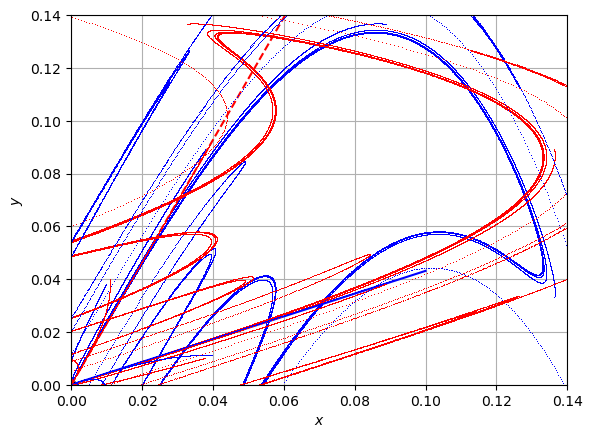

In [8]:
def fixed_point_manifolds(a=2.75,b=-100):
    x10 = 0
    x11 = np.sqrt((2-a) / b)
    x12 = -np.sqrt((2-a) / b)
    y10 = x10
    y11 = x11
    y12 = x12

    DH0 = np.matrix([[0, 1], [-1, a+3*b*y10**2]])
    DH1 = np.matrix([[0, 1], [-1, a+3*b*y11**2]])
    DH2 = np.matrix([[0, 1], [-1, a+3*b*y12**2]])

    fp10 = {'fxpt': (x10, y10), 'eigvals': np.linalg.eig(DH0).eigenvalues, 'eigvecs': np.linalg.eig(DH0).eigenvectors}
    fp11 = {'fxpt': (x11, y11), 'eigvals': np.linalg.eig(DH1).eigenvalues, 'eigvecs': np.linalg.eig(DH1).eigenvectors}
    fp12 = {'fxpt': (x12, y12), 'eigvals': np.linalg.eig(DH2).eigenvalues, 'eigvecs': np.linalg.eig(DH2).eigenvectors}

    # return (fp10, fp11, fp12)
    return [fp10]

plot_fixed_point_manifolds(fixed_point_manifolds(), a=2.75, b=-100, f=lambda x,y,a,b: (y, (a+b*y**2)*y - x), inv_f=lambda x,y,a,b: ((a+b*x**2)*x-y,x), d_val=0.1, steps=10000, num_iters=10, xlim=(0,.14), ylim=(0,.14))

(ii) Comment on the nature (symmetries) of these manifolds.

(iii) What is the behavior of orbits starting at points lying on the intersection between the stable and unstable manifolds?


### Problem 5e

(i) Find, as accurately as possible (zooming in), the coordinate of the point $P_0$ (see Fig. 2) from the plot obtained in (d).

(ii) Iterate 5 times forward and 5 times backwards $P_0$, write down the resulting orbit $\{A_n\}_{n = -5}^5$ (where $A_n$ is the $y$-coordinate of $P_n$) and plot it as in the right panel of Fig. 2.

(iii) Where does the orbit starting at $P_0$ tend to? Why> And if we iterate the map backwards where does the orbit end to? Is this consistent with the fact that $P_0$ belongs to both manifolds? Explain.

(iv) Iterate numerically $P_0$ 40 times backwards and forwards. Do you obtain what you expected in (iii)? Why or why not?


### Problem 6

In the paper: "A Map Approach to Stationary Solutions of the Discrete Nonlinear Schrodinger Equation" by R.Carretero-Gonzalez, Modern Physics 232 (2009) (see: http://carretero.sdsu.edu/[Publications][paper #59]), the author discusses the relationship between steady state configurations in nonlinear lattices and orbits of auxillary 2D maps.

The aim of this exercise is to reproduce the stable and unstable manifolds and orbits depicted in Fig. 11.3 of the paper. Notice that in this case, also the stable/unstable manifolds from two different fixed points intersect. This type of intersection is called a heteroclinic orbit. [heteroclinic since it connects a fixed point with another fixed point].

<img src="figs/fig113-prob6.PNG" width="600" />

Consider the two-dimensional map defined in Eq. (11.5) of the paper [with $\epsilon = 1$]:

$$
\begin{cases}
v_{n+1} = R(v_n, w_n) = [(\Lambda + 2)v_n - w_n + \beta v_n^3], \\
w_{n+1} = v_n
\end{cases}
$$

(d) [this is for the extra credit] Repeat (b) and (c) for the Fig. 11.4

(e) [this is for more extra credit] Repeat (b) and (c) for the Fig. 11.5


#### Problem 6a

(i) Find the fixed point(s) of $M$ and classify its(their) stability as a function of $\Lambda$ and $\beta$.

$$
\begin{align*}
    v_n &= (\Lambda + 2)v_n - w_n + \beta v_n^3 \\
    w_n &= v_n \\
    v_n &= (\Lambda + 2)v_n - v_n + \beta v_n^3 \\
    0 &= (\Lambda + 2)v_n - 2v_n + \beta v_n^3 \\
    0 &= \Lambda v_n + 2v_n - 2v_n + \beta v_n^3 \\
    0 &= \Lambda v_n + \beta v_n^3 \\
    0 &= v_n(\Lambda + \beta v_n^2)
\end{align*}
$$

Such that, we get the following fixed points:

$$
v_n = w_n = 0, \pm \sqrt{\frac{-\Lambda}{\beta}}
$$

Notice the Jacobian of $M$:

$$
DM(v_n, w_n) = \begin{pmatrix}
    \Lambda + 2 + 3\beta v_n^2 & -1 \\
    1 & 0
\end{pmatrix}
$$

Finding the eigenvalues at $(v_{1,1},w_{1,1}) = (0,0)$:

$$
|DM(v_{1,1},w_{1,1}) - \lambda I| = \left|\begin{pmatrix}
    \Lambda + 2 - \lambda & -1 \\
    1 & 0 - \lambda
\end{pmatrix}\right| = (\Lambda + 2 - \lambda)(-\lambda) + 1 = \lambda^2 - (\Lambda + 2)\lambda + 1 = 0 \\
\lambda = \frac{(\Lambda + 2) \pm \sqrt{(\Lambda + 2)^2 - 4}}{2} = \frac{(\Lambda + 2) \pm \sqrt{\Lambda^2 + 4\Lambda}}{2}
$$

For ($\Lambda < -4$), $|\lambda| = \left|\frac{(\Lambda + 2) + \sqrt{\Lambda^2 + 4\Lambda}}{2}\right| < 1$ and $|\lambda| = \left|\frac{(\Lambda + 2) - \sqrt{\Lambda^2 + 4\Lambda}}{2}\right| > 1$, such that we get a saddle point

For ($\Lambda > 0$), $|\lambda| = \left|\frac{(\Lambda + 2) + \sqrt{\Lambda^2 + 4\Lambda}}{2}\right| > 1$ and $|\lambda| = \left|\frac{(\Lambda + 2) - \sqrt{\Lambda^2 + 4\Lambda}}{2}\right| < 1$, such that we get a saddle point

Finding the eigenvalues at $(v_{1,2},w_{1,2}) = \left(\frac{-\Lambda}{\beta}, \frac{-\Lambda}{\beta}\right)$:

$$
|DM(v_{1,2},w_{1,2}) - \lambda I| = \left|\begin{pmatrix}
    \Lambda + 2 + 3\beta\left(\frac{-\Lambda}{\beta}\right) - \lambda & -1 \\
    1 & 0 - \lambda
\end{pmatrix}\right| = \left|\begin{pmatrix}
    2 - 2\Lambda - \lambda & -1 \\
    1 & 0 - \lambda
\end{pmatrix}\right| = (2 - 2\Lambda - \lambda)(-\lambda) + 1 = \lambda^2 - (2 - 2\Lambda)\lambda + 1 = 0 \\
\lambda = \frac{(2 - 2\Lambda) \pm \sqrt{(2 - 2\Lambda)^2 - 4}}{2} = (1 - \Lambda) \pm \sqrt{\Lambda^2 - 2\Lambda}
$$

For ($\Lambda < 0$), $|\lambda| = \left|(1 - \Lambda) + \sqrt{\Lambda^2 - 2\Lambda}\right| > 1$ and $|\lambda| = \left|(1 - \Lambda) - \sqrt{\Lambda^2 - 2\Lambda}\right| < 1$, such that we get a saddle point

For ($\Lambda > 2$), $|\lambda| = \left|(1 - \Lambda) + \sqrt{\Lambda^2 - 2\Lambda}\right| < 1$ and $|\lambda| = \left|(1 - \Lambda) - \sqrt{\Lambda^2 - 2\Lambda}\right| > 1$, such that we get a saddle point

(ii) What are the coordinates on $\Lambda$ and $\beta$ such that the origin is a saddle point?

We get the origin being a saddle point for $\lambda < -4$ and $\lambda > 0$


#### Problem 6b

Use the program for computing manifolds that you wrote for the previous exercise to obtain all the stable and unstable manifolds depicted in Fig. 11.3 (i.e., the left panel of the figure). Comment on the nature of these manifolds.


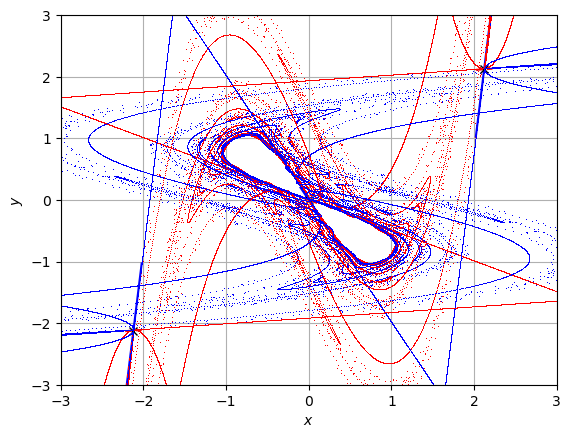

In [9]:
def fixed_point_manifolds(a=-4.5,b=1):
    x11 = 0
    y11 = x11
    x12 = np.sqrt(-a/b)
    y12 = x12
    x13 = -np.sqrt(-a/b)
    y13 = x13

    DH1 = np.matrix([[a + 2 + 3*b*x11**2, -1], [1, 0]])
    DH2 = np.matrix([[a + 2 + 3*b*x12**2, -1], [1, 0]])
    DH3 = np.matrix([[a + 2 + 3*b*x13**2, -1], [1, 0]])

    fp11 = {'fxpt': (x11, y11), 'eigvals': np.linalg.eig(DH1).eigenvalues, 'eigvecs': np.linalg.eig(DH1).eigenvectors}
    fp12 = {'fxpt': (x12, y12), 'eigvals': np.linalg.eig(DH2).eigenvalues, 'eigvecs': np.linalg.eig(DH2).eigenvectors}
    fp13 = {'fxpt': (x13, y13), 'eigvals': np.linalg.eig(DH3).eigenvalues, 'eigvecs': np.linalg.eig(DH3).eigenvectors}

    return (fp11, fp12, fp13)


plot_fixed_point_manifolds(fixed_point_manifolds(), a=-4.5, b=1, f=lambda x,y,a,b: ((a+2)*x - y + b*x**3, x), inv_f=lambda x,y,a,b: (y, (a+2)*y - x + b*y**3), d_val=20, steps=10000, num_iters=10, xlim=(-3,3), ylim=(-3,3))

#### Problem 6c

Similarly to the previous exercise, find, to the best of your capability, the coordinates of the intersection points ($P_0$ and $Q_0$ of the left panel of Fig. 11.3) between appropriate manifolds to reproduce the orbits depicted in the right panel of Fig. 11.3.
